In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
pip install openpyxl

In [45]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Reading the Data using the Engine xlrd - which is used to read the excel file in the format (xls, xlsx)
#openpyxl is used to read and write excel files (xlsx, xlsm, xltx and xltm)
data_1 = pd.read_excel("./L1_LinearRegression/DS2.xls", engine='xlrd')
data_1.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [3]:
#Finding if the Dataset has any na values or null values
print(data_1.isna().values.any())
print(data_1.isnull().values.any())

False
False


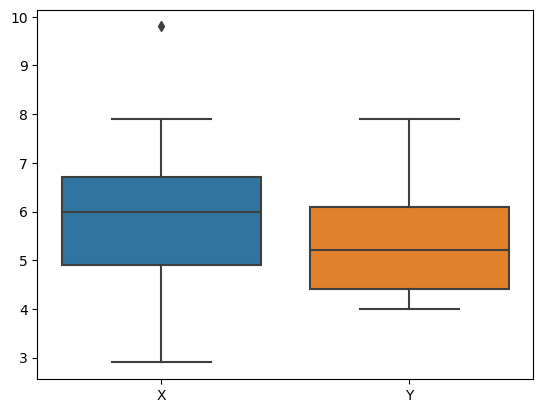

In [4]:
#Visulizing the Dataset to find whether we have any outliers
import seaborn as sns
sns.boxplot(data_1) #Box Plot
plt.show()

In [5]:
#Identifying and Removing Outliers in the Dataset using IQR (Interquartile range)

import numpy as np

#Calculating the Interquartile Range for X
x_q25, x_q75 = np.percentile(data_1['X'], 25), np.percentile(data_1['X'], 75, method='midpoint')
x_iqr = x_q75 - x_q25
print('Percentiles (X): 25th=%.3f, 75th=%.3f, IQR=%.3f' %(x_q25, x_q75, x_iqr))

#Calculating the Interquartile Range for Y
y_q25, y_q75 = np.percentile(data_1['Y'], 25), np.percentile(data_1['Y'], 75, method='midpoint')
y_iqr = y_q75 - y_q25
print('Percentiles (Y): 25th=%.3f, 75th=%.3f, IQR=%.3f' %(y_q25, y_q75, y_iqr))

#Calculating the Outlier cutoff (i.e. defining the Upper and lower bounds)

#Base values of X
x_cut_off = x_iqr * 1.5
x_lower, x_upper = x_q25 - x_cut_off, x_q75 + x_cut_off

#Base values of Y
y_cut_off = y_iqr * 1.5
y_lower, y_upper = y_q25 - y_cut_off, y_q75 + y_cut_off

#Identifying the Outliers
#In X
x_upper_array = np.array(data_1['X']>=x_upper)
print("Upper Bound: ", x_upper)
print("No. of Outliers of X above the upper bound: ", x_upper_array.sum())

x_lower_array = np.array(data_1['X']<= x_lower)
print("Lower Bound: ", x_lower)
print("No. of Outliers of X below the lower bound: ", x_lower_array.sum())

print("No. of Outliers of X: ", x_upper_array.sum() + x_lower_array.sum())

#In Y
y_upper_array = np.array(data_1['Y']>=y_upper)
print("Upper Bound: ", y_upper)
print("No. of Outliers of Y above the upper bound: ", y_upper_array.sum())

y_lower_array = np.array(data_1['Y']<= y_lower)
print("Lower Bound: ", y_lower)
print("No. of Outliers of Y below the lower bound: ", y_lower_array.sum())

print("No. of Outliers of Y: ", y_upper_array.sum() + y_lower_array.sum())

Percentiles (X): 25th=4.900, 75th=6.700, IQR=1.800
Percentiles (Y): 25th=4.400, 75th=6.100, IQR=1.700
Upper Bound:  9.39999938
No. of Outliers of X above the upper bound:  1
Lower Bound:  2.200000524
No. of Outliers of X below the lower bound:  0
No. of Outliers of X:  1
Upper Bound:  8.64999962
No. of Outliers of Y above the upper bound:  0
Lower Bound:  1.8500003800000009
No. of Outliers of Y below the lower bound:  0
No. of Outliers of Y:  0


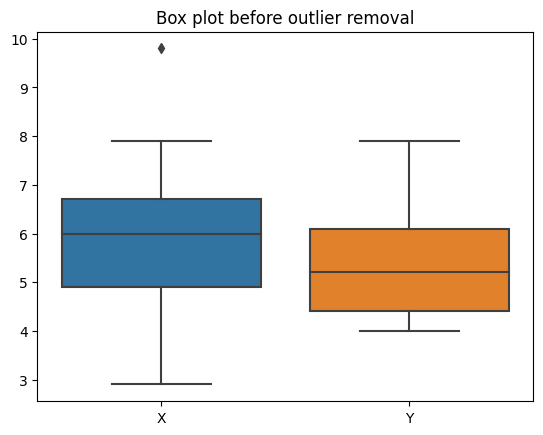

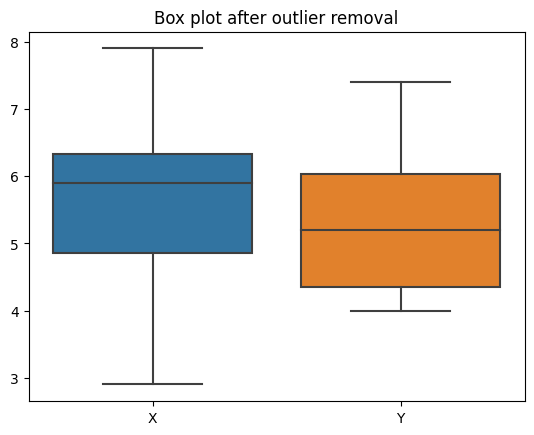

In [6]:
#Removing the Outliers using IQR Method

sns.boxplot(data_1)
plt.title('Box plot before outlier removal')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] >= (iqr + np.percentile(df[field_name], 75))].index, inplace=True) #Removing Outliers above the upper bound
    df.drop(df[df[field_name] <= (np.percentile(df[field_name], 25) - iqr)].index, inplace=True) #Removing Outliers below the lower bound

drop_outliers(data_1, 'X')
drop_outliers(data_1, 'Y')
sns.boxplot(data_1)
plt.title('Box plot after outlier removal')
plt.show()

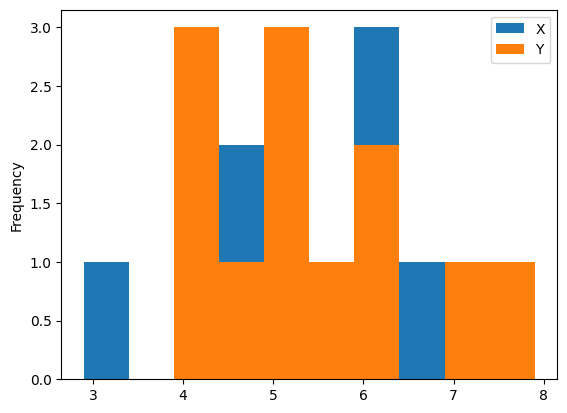

In [7]:
#Finding out which features affects the overall output
data_1.plot(kind='hist')
plt.show()

,X,Y
0,-2.065312,-1.183710
1,0.805975,1.743283
2,-0.554108,-0.322830
3,1.712698,1.571107
5,0.957096,0.624138
6,0.352614,0.538050
7,0.428174,0.365874
8,0.277054,-0.150654
9,-0.402988,-1.011535
10,-0.705229,-1.183710


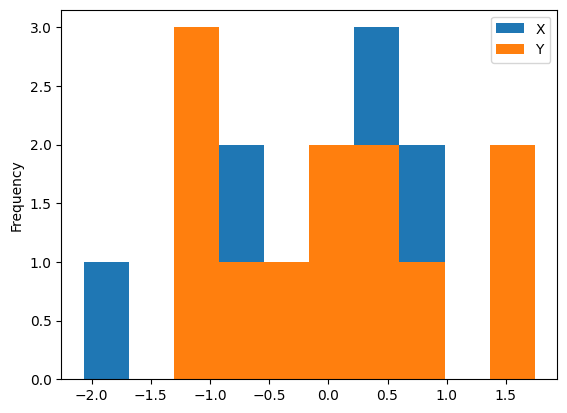

In [8]:
#Copying the Dataset
data_1_copy = data_1.copy()

#Applying the Z-score Normalization Technique
for column in data_1_copy:
    data_1_copy[column] = (data_1_copy[column] - data_1_copy[column].mean()) / data_1_copy[column].std()

#Viewing the Normalized Data
display(data_1_copy)

#Plotting
data_1_copy.plot(kind='hist')
plt.show()

In [9]:
#Splitting the Dataset into training and testing using numpy

data_split = np.random.rand(len(data_1_copy)) < 0.8 #Getting 80% of the overall dataset
train_data = data_1_copy[data_split] #80% data as train_data
test_data = data_1_copy[~data_split] #Remaining data as test_data
print(train_data)
print(test_data)

           X         Y
0  -2.065312 -1.183710
1   0.805975  1.743283
2  -0.554108 -0.322830
3   1.712698  1.571107
6   0.352614  0.538050
8   0.277054 -0.150654
9  -0.402988 -1.011535
10 -0.705229 -1.183710
11 -0.931909 -0.839358
12  0.125934 -0.150654
          X         Y
5  0.957096  0.624138
7  0.428174  0.365874


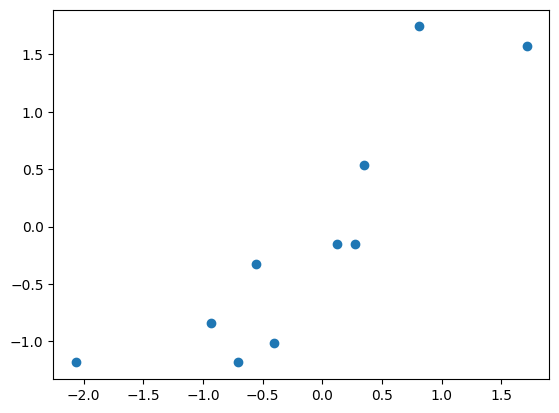

In [10]:
#Plotting the Data

plt.scatter(train_data['X'], train_data['Y'])
plt.show()

In [11]:
#Feature Selection
X = train_data['X'].values
Y = train_data['Y'].values
print("Target: %s, \nFeatures: %s" %(Y, X))

Target: [-1.18371049  1.74328289 -0.32283011  1.57110657  0.53805027 -0.1506542
 -1.01153458 -1.18371049 -0.83935826 -0.1506542 ], 
Features: [-2.06531185  0.80597525 -0.554108    1.71269777  0.35261417  0.27705405
 -0.40298776 -0.7052286  -0.93190896  0.1259338 ]


In [12]:
#Determining the Mean
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

print(n)

10


In [13]:
#Calculating the Slope and y-intercept
num = 0
denom = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = num / denom 
c = mean_y - (m * mean_x)

#printing the Coefficients
print("m = ", m)
print("c = ", c)

m =  0.899806487961654
c =  0.02564624616731008


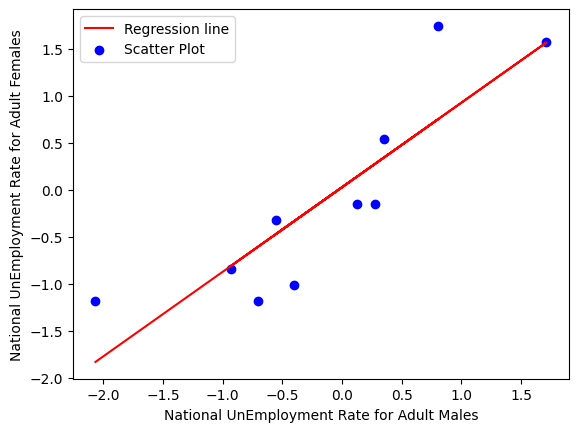

In [14]:
#Plotting the values and Regression Line

#We are increasing the boundary of the regression line by adding 10 units to max of x and subtracting 10 units from the min of x
# max_x = np.max(X) + 10
# min_x = np.min(Y) - 10

# #Line values for x and y
# x = np.linspace(min_x, max_x, 1000) #This line generates a sequence of 100 evenly spaced x-values between min_x and max_x
y = c + m * X



#Plotting the Regression line
plt.plot(X, y, color="Red", label="Regression line")

#Plotting the Scatter Points
plt.scatter(X, Y, color="Blue", label="Scatter Plot")
plt.xlabel("National UnEmployment Rate for Adult Males")
plt.ylabel("National UnEmployment Rate for Adult Females")
plt.legend()
plt.show()

In [15]:
#Getting the Values of Test data
X_test = test_data['X'].values
Y_test = test_data['Y'].values

mean_test_X = X_test.mean()
mean_test_Y = Y_test.mean()

In [16]:
#Calculating the Mean Squared Error (MSE)

sq_error = 0 #Squared Error

for i in range(len(X_test)):
    y_pred = c + m * X_test[i]
    sq_error += (Y_test[i] - y_pred)**2

MSE = sq_error / mean_test_Y
print("The Mean Squared Error is: ", MSE)

The Mean Squared Error is:  0.14352380455824426


In [17]:
#Calculating R-Squared value for measuring goodness of our model

sst = 0 #Total Sum of Squares
ssr = 0 #Total Sum of Squares of Residuals

for i in range(len(X_test)):
    y_pred = c + m * X_test[i]
    sst += (Y_test[i] - mean_test_Y) **2
    ssr += (Y_test[i] - y_pred) **2
r2 = 1- (ssr/sst)
print("R-Squared Test: ",r2)

R-Squared Test:  -1.130283243825843


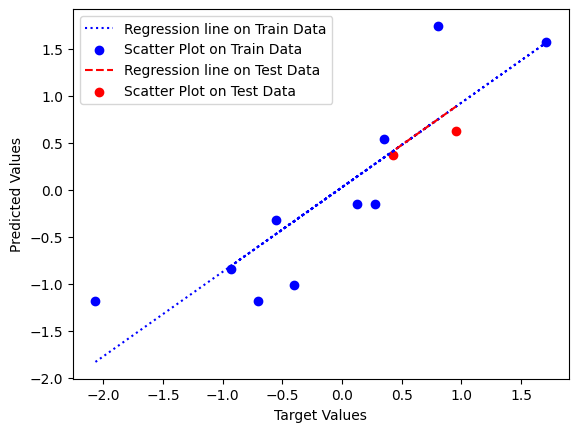

In [18]:
#Plotting the values and Regression Line

#We are increasing the boundary of the regression line by adding 10 units to max of x and subtracting 10 units from the min of x
# max_x = np.max(X) + 10
# min_x = np.min(Y) - 10

# #Line values for x and y
# x = np.linspace(min_x, max_x, 1000) #This line generates a sequence of 100 evenly spaced x-values between min_x and max_x

#Training Dataset
y = c + m * X

#Plotting the Regression line
plt.plot(X, y, color="Blue", label="Regression line on Train Data", linestyle="dotted")

#Plotting the Scatter Points
plt.scatter(X, Y, color="Blue", label="Scatter Plot on Train Data")


#Test Dataset
y_test = c + m * X_test

#Plotting the Regression line
plt.plot(X_test, y_test, color="Red", label="Regression line on Test Data", linestyle="dashed")

#Plotting the Scatter Points
plt.scatter(X_test, Y_test, color="Red", label="Scatter Plot on Test Data")
plt.xlabel("Target Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()